### K-Means Clustering

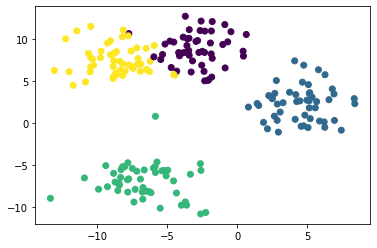

In [115]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate Blobs with different distribution and shape

X, y = make_blobs(n_samples = 200, 
                    centers=4, 
                    n_features=2, 
                    cluster_std=[2,2,2,2], 
                    random_state=42)


fig, ax = plt.subplots()
_ = ax.scatter(X[:,0], X[:, 1], c=y)

## How to find the Optimum value of K?

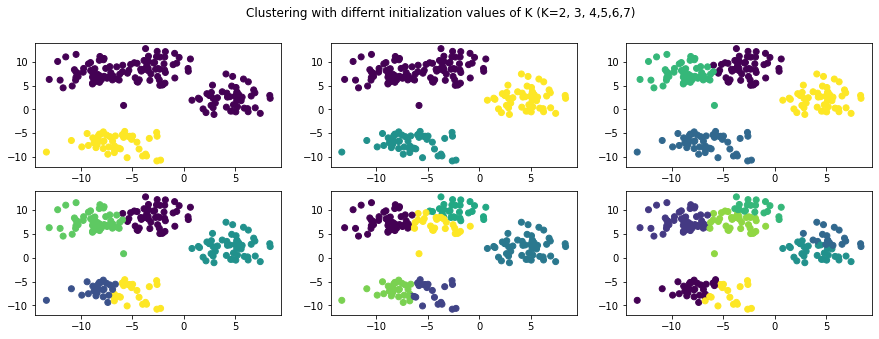

In [60]:
# Clustering with different number of clusters

from sklearn.cluster import KMeans

kmeans_clf_1 = KMeans(n_clusters=2)
kmeans_clf_2 = KMeans(n_clusters=3)
kmeans_clf_3 = KMeans(n_clusters=4)
kmeans_clf_4 = KMeans(n_clusters=5)
kmeans_clf_5 = KMeans(n_clusters=6)
kmeans_clf_6 = KMeans(n_clusters=7)

kmeans_clf_1.fit(X)
kmeans_clf_2.fit(X)
kmeans_clf_3.fit(X)
kmeans_clf_4.fit(X)
kmeans_clf_5.fit(X)
kmeans_clf_6.fit(X)

y1 = kmeans_clf_1.predict(X)
y2 = kmeans_clf_2.predict(X)
y3 = kmeans_clf_3.predict(X)
y4 = kmeans_clf_4.predict(X)
y5 = kmeans_clf_5.predict(X)
y6 = kmeans_clf_6.predict(X)

fig, axes = plt.subplots(2,3,figsize=(15,5))
_ = axes[0,0].scatter(X[:,0], X[:, 1], c=y1)
_ = axes[0,1].scatter(X[:,0], X[:, 1], c=y2)
_ = axes[0,2].scatter(X[:,0], X[:, 1], c=y3)
_ = axes[1,0].scatter(X[:,0], X[:, 1], c=y4)
_ = axes[1,1].scatter(X[:,0], X[:, 1], c=y5)
_ = axes[1,2].scatter(X[:,0], X[:, 1], c=y6)

#_ = ax4.scatter(X[:,0], X[:, 1], c=y5)
_ = plt.suptitle("Clustering with differnt initialization values of K (K=2, 3, 4,5,6,7)")

### The Elbow method to find the optimum 'K'
Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish.

C:\Users\shres\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


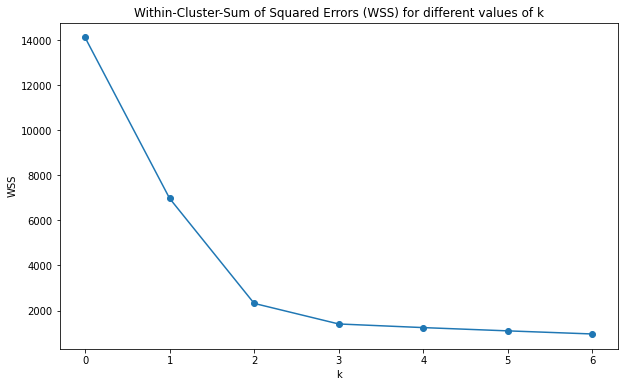

In [72]:
def compute_wss(X, k_max):
    wss = []
    for k in range(1,k_max+1):
        k_means_clf = KMeans(n_clusters=k).fit(X)
        centroids = k_means_clf.cluster_centers_
        pred_clusters = k_means_clf.predict(X)
        curr_wss = 0
        
        for i in range(len(X)):
            curr_centroid = centroids[pred_clusters[i]]
            curr_wss += (X[i, 0] - curr_centroid[0])**2 + (X[i, 1] - curr_centroid[1])**2
        wss.append(curr_wss)
    return wss
                                    
        
wss = compute_wss(X, 7)        
fig, ax = plt.subplots()
_ = ax.plot(wss, marker='o')
_ = ax.set(title='Within-Cluster-Sum of Squared Errors (WSS) for different values of k',
          xlabel='k',
          ylabel='WSS')

From the above figure, we can see that the optimum value of k is 3 (At k=3, the plot is visible as elbow).

## Anisotropicly Distributed Blobs

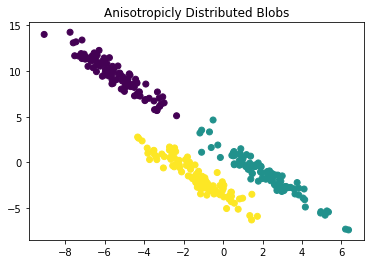

In [116]:
import numpy as np

X, y = make_blobs(n_samples = 300, 
                    centers=3, 
                    n_features=2, 
                    cluster_std=[2,2,2], 
                    random_state=42)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

fig, ax = plt.subplots()
_ = ax.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
_ = ax.set_title("Anisotropicly Distributed Blobs")

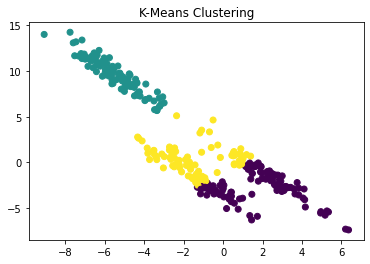

In [117]:
pred_clusters = KMeans(n_clusters=3).fit_predict(X_aniso)

fig, ax = plt.subplots()
_ = ax.scatter(X_aniso[:, 0], X_aniso[:, 1], c=pred_clusters)
_ = ax.set_title("K-Means Clustering")

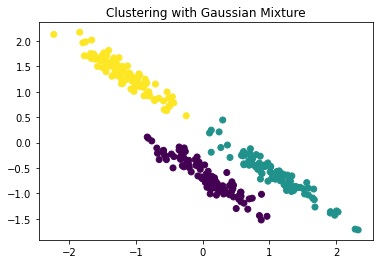

In [118]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

X_aniso = StandardScaler().fit_transform(X_aniso)
gmixture = GaussianMixture(n_components=3)
gmixture.fit(X_aniso)
pred_cluster = gmixture.predict(X_aniso)

fig, ax = plt.subplots()
_ = ax.scatter(X_aniso[:, 0], X_aniso[:, 1], c=pred_cluster)
_ = ax.set_title("Clustering with Gaussian Mixture")

### Agglomerative Clustering(Heirarchical Clustering)

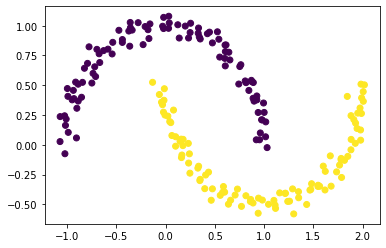

In [143]:
import numpy as np
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

fig, ax = plt.subplots()
_ = ax.scatter(X[:, 0], X[:, 1], c=y)


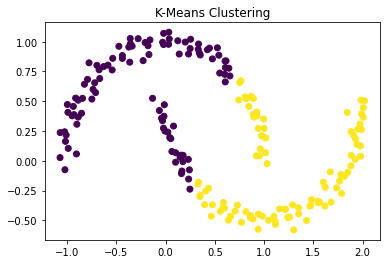

In [145]:
pred_clusters = KMeans(n_clusters=2).fit_predict(X)

fig, ax = plt.subplots()
_ = ax.scatter(X[:, 0], X[:, 1], c=pred_clusters)
_ = ax.set_title("K-Means Clustering")

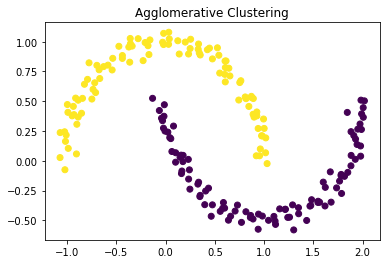

In [146]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_moons(200, noise=.05, random_state=0)

pred_clusters = AgglomerativeClustering(n_clusters=2, 
                                        linkage='single',
                                        affinity='euclidean').fit_predict(X)

fig, ax = plt.subplots()
_ = ax.scatter(X[:, 0], X[:, 1], c=pred_clusters)
_ = ax.set_title("Agglomerative Clustering")
